In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Exercise 3.1: Auto-correlation

In [2]:
barker = [1,1,1,-1,-1,-1,1,-1,-1,1,-1]
rect = [1 for i in range(len(barker))]

In [3]:
auto_barker = np.correlate(barker,barker,mode='full') # for 1. entry: 1. ele of array touches last ele of other array
auto_rect = np.correlate(rect,rect,mode='full')

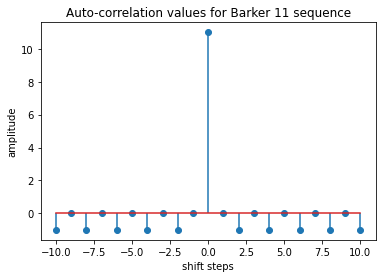

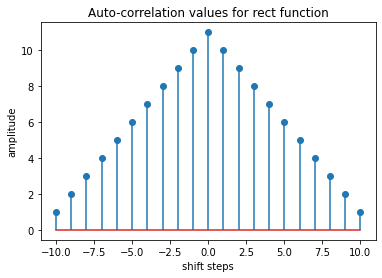

In [4]:
x_range = [i for i in range(-int(len(auto_barker)/2),int(len(auto_barker)/2)+1)]

plt.stem(x_range,auto_barker)#,c='green',marker='o')
plt.title('Auto-correlation values for Barker 11 sequence')
plt.xlabel('shift steps')
plt.ylabel('amplitude')
plt.show()

plt.stem(x_range,auto_rect)#,c='orange',marker='+')
plt.title('Auto-correlation values for rect function')
plt.xlabel('shift steps')
plt.ylabel('amplitude')
plt.show()

The main peaks are at the center of both functions. Reason: We have an full overlap of the arrays in auto-correlation there. When you correlate an array with itself you get a high value there because both arrays point in same direction.

For the rectengular function we have the more overlap of the identical arrays in the auto-correlation the higher the auto-correlation values because only positive values are summed up with values constant 1 (linear increase/decrease of function).<br>
In contrast, the Barker 11 sequence has also negative values such that the sum is not always additive.


The rect function needs the width/length of Barker 11 (eleven elements) and a magnitude of 1 to get the same peak value as Barker 11. 

## Homework 3.1: Cross-Correlation to Detect a Signal

In [5]:
receive_signal = [0]*20 + rect + [0]*39 + ((-1)*np.array(rect)).tolist() + [0]*20

In [6]:
corr_signal_rect = np.correlate(receive_signal,rect,mode='full')

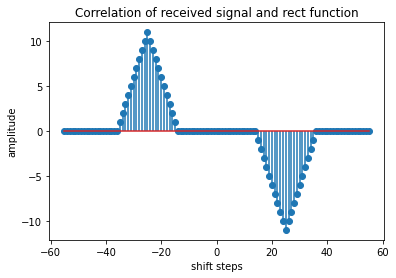

In [7]:
x_range = [i for i in range(-int(len(corr_signal_rect)/2),int(len(corr_signal_rect)/2)+1)]

plt.stem(x_range,corr_signal_rect)#,c='orange',marker='+')
plt.title('Correlation of received signal and rect function')
plt.xlabel('shift steps')
plt.ylabel('amplitude')
plt.show()

Relation peaks to auto-correlation rect func/test signal: When the test signal discovers itself in the receive signal (zero-padded around searched signal) during correlation then we get the same peak as for auto-correlation of the test signal (because it is exactly like that). Besides that, when it discovers its negated version then we also have auto-correlation like in the first case but in negative direction. The negative values sum up in negative direction for a signal (which has only non-negative values) meeting its negative version.

The peaks occur as described above where the auto-correlation takes place, i.e. where the test signal finds itself (or its negated version) within the received signal.

## Homework 3.2: Cross-Correlation to Detect a Signal in Noise

In [8]:
np.random.seed(1000)
std = np.sqrt(0.8)
gauss_noise = std*np.random.randn(len(receive_signal))

noised_received_signal = np.array(receive_signal) + gauss_noise

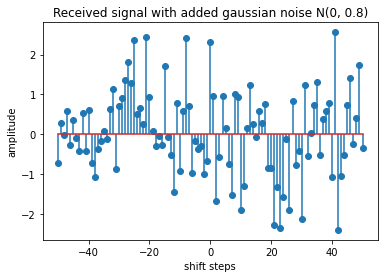

In [9]:
x_range = [i for i in range(-int(len(noised_received_signal)/2),int(len(noised_received_signal)/2)+1)]

plt.stem(x_range,noised_received_signal)#,c='orange',marker='+')
plt.title('Received signal with added gaussian noise N(0, 0.8)')
plt.xlabel('shift steps')
plt.ylabel('amplitude')
plt.show()

The two rect components are not clearly visible anymore. <br>
The mean stays the same but the single samples start to spread out to higher positive/negative values (because of the variance of the noise signal). For different seeds we can observe that most of the times the two rect components are imaginable because the there located values are almost all either positive (for the postive rect component) or negative (for the negative rect component).

In [10]:
corr_noised_rect = np.correlate(noised_received_signal,rect,mode='full')

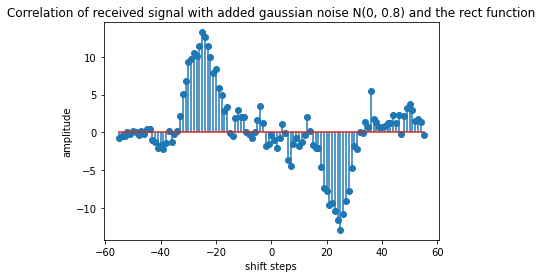

In [11]:
x_range = [i for i in range(-int(len(corr_noised_rect)/2),int(len(corr_noised_rect)/2)+1)]

plt.stem(x_range,corr_noised_rect)#,c='orange',marker='+')
plt.title('Correlation of received signal with added gaussian noise N(0, 0.8) and the rect function')
plt.xlabel('shift steps')
plt.ylabel('amplitude')
plt.show()

We can clearly detect the correlation peaks. Even when noise modifies the values a bit the rect func/transmit signal still reacts to the noised version of itself within the received signal. Therefore, we get peaks at the locations of its negative version and itself within the received signal.

## Homework 3.3: Using the Barker 11 Sequence

### Redo Homework 3.1 with Barker 11:

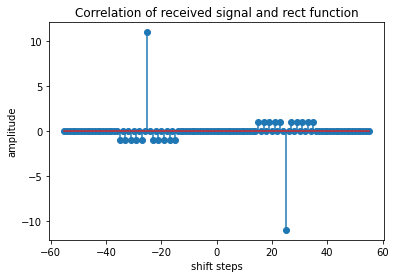

In [12]:
receive_signal_bark = [0]*20 + barker + [0]*39 + ((-1)*np.array(barker)).tolist() + [0]*20
corr_signal_bark = np.correlate(receive_signal_bark, barker, mode='full')

x_range = [i for i in range(-int(len(corr_signal_bark)/2),int(len(corr_signal_bark)/2)+1)]

plt.stem(x_range,corr_signal_bark)#,c='orange',marker='+')
plt.title('Correlation of received signal and rect function')
plt.xlabel('shift steps')
plt.ylabel('amplitude')
plt.show()

Here accounts the same answer as done before with the rect func. In short: The Barker 11 sequence is able to detect itself/its negated version within the received signal. For its copy version we get an auto-correlation because the copy is embedded in a 0-valued sequence. For its negative version we can observe again the mirrored autocorrelation values.<br>
Therefore, the peaks occurs where the Barker 11 copies are embedded within the received signal. Especially, when we have an total overlap within the auto-correlation, we get the peak/highest value for the autocorrelation. The Barker 11 detected fully itself. 

### Redo Homework 3.2 with Barker 11:

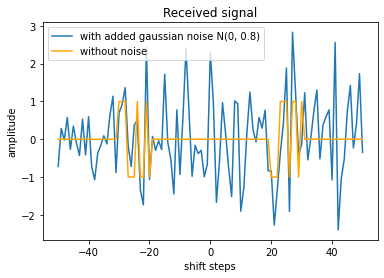

In [13]:
np.random.seed(1000)
std = np.sqrt(0.8)
gauss_noise = std*np.random.randn(len(receive_signal_bark))

noised_received_signal_bark = np.array(receive_signal_bark) + gauss_noise

x_range2 = [i for i in range(-int(len(noised_received_signal_bark)/2),int(len(noised_received_signal_bark)/2)+1)]

plt.plot(x_range2,noised_received_signal_bark)#,c='orange',marker='+')
plt.plot(x_range2,receive_signal_bark,c='orange')#,marker='+')
plt.legend(['with added gaussian noise N(0, 0.8)', 'without noise'])
plt.title('Received signal')
plt.xlabel('shift steps')
plt.ylabel('amplitude')
plt.show()

The Barker 11 sequence is not clearly detectable for the human eye. <br>
The mean stays the same but the single samples start to spread out to higher positive/negative values (because of the variance of the noise signal). For different seeds we observe that the areas with the (negated) Barker 11 sequences always have high values what is not necessary the case for the other areas where the original received signal would be 0.

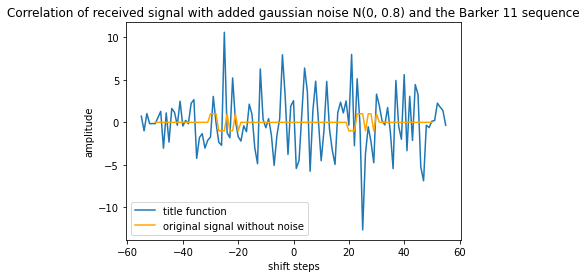

In [14]:
corr_noised_bark = np.correlate(noised_received_signal_bark,barker,mode='full')

x_range = [i for i in range(-int(len(corr_noised_bark)/2),int(len(corr_noised_bark)/2)+1)]

plt.plot(x_range,corr_noised_bark)#,c='orange',marker='+')
plt.plot(x_range2,receive_signal_bark,c='orange')#,marker='+')
plt.legend(['title function', 'original signal without noise'])
plt.title('Correlation of received signal with added gaussian noise N(0, 0.8) and the Barker 11 sequence')
plt.xlabel('shift steps')
plt.ylabel('amplitude')
plt.show()

The two highest peaks of the noised received signal correlated with the Barker 11 sequence are indeed at the middle of the occuring Barker 11 sequences within the received signal. As stated above at this position the auto-correlation is the highest. So, we get a result guessing the location of the Barker 11 sequences within the received signal. However, there are also other high peaks within the correlation signal. So, it is not that obvious this time. The auto-correlation peaks are not that good visible.

### Summary

The rect func is more suited to detect itself within a received signal. The Barker 11 correlation peaks are more affected by noise than it is the case for the rect func.

## Homework 3.4: Monte-Carlo Simulation: Peak Localization

In [15]:
receive_monte_rect = [0]*10 + rect + [0]*10
receive_monte_bark = [0]*10 + barker + [0]*10

In [16]:
np.random.seed(1000)

y = 10 + int(len(barker)/2)+1 # accounts for both signals # true location of the peak correlation, it has
# to be in the middle of the searched signal because then we have an full auto-correlation overlap which
# is always symmetric

RMSE_coll_bark = []
RMSE_coll_rect = []

M = 1000

for single_var in np.logspace(-1,2,21):
    std = np.sqrt(single_var)
    rmse_sum_bark, rmse_sum_rect = 0, 0

    for m in range(M):
        gauss_noise = std*np.random.randn(len(receive_monte_bark)) # each time we generate other noise but
        # with same distribution conditions

        receive_monte_bark_noised = np.array(receive_monte_bark) + gauss_noise    
        receive_monte_rect_noised = np.array(receive_monte_rect) + gauss_noise

        corr_monte_bark = np.correlate(receive_monte_bark_noised,barker,mode='same') # mode same to not
        # change the size
        corr_monte_rect = np.correlate(receive_monte_rect_noised,rect,mode='same')

        y_est_bark = np.argmax(corr_monte_bark)
        y_est_rect = np.argmax(corr_monte_rect)
        
        rmse_sum_bark += (y_est_bark - y)**2
        rmse_sum_rect += (y_est_rect - y)**2
        
    RMSE_coll_bark.append(np.sqrt(rmse_sum_bark/M)) 
    RMSE_coll_rect.append(np.sqrt(rmse_sum_rect/M)) 

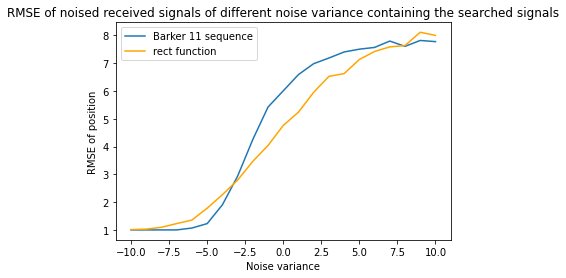

In [17]:
x_range = [i for i in range(-int(len(RMSE_coll_bark)/2),int(len(RMSE_coll_bark)/2)+1)]

plt.plot(x_range,RMSE_coll_bark)#,c='orange',marker='+')
plt.plot(x_range,RMSE_coll_rect,c='orange')#,marker='+')
plt.legend(['Barker 11 sequence', 'rect function'])
plt.title('RMSE of noised received signals of different noise variance containing the searched signals')
plt.xlabel('Noise variance')
plt.ylabel('RMSE of position')
plt.show()